#  Day 2

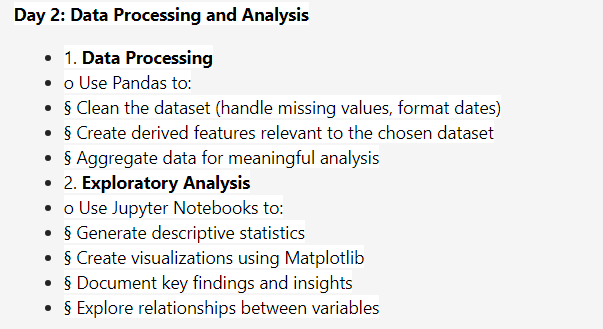

Day 2: Data Processing and Analysis
1. Data Processing
o Use Pandas to:
- Clean the dataset (handle missing values, format dates)
- Create derived features relevant to the chosen dataset
- Aggregate data for meaningful analysis
2. Exploratory Analysis
o Use Jupyter Notebooks to:
- Generate descriptive statistics
- Create visualizations using Matplotlib
- Document key findings and insights
- Explore relationships between variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Toyota.csv')
df

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


In [6]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [7]:
df.isnull().sum()

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [ ]:

# Replace ?? with NaN
df.replace("??", np.nan, inplace=True)

# Convert data types
df['KM'] = df['KM'].str.replace(',', '').astype(float)
df['HP'] = pd.to_numeric(df['HP'], errors='coerce')
df['Doors'] = df['Doors'].replace({'three': 3, 'four': 4, 'five': 5}).astype(float)

#  missing values
df.fillna({
    'Age': df['Age'].median(),
    'KM': df['KM'].median(),
    'HP': df['HP'].median(),
    'FuelType': df['FuelType'].mode()[0],
    'MetColor': df['MetColor'].mode()[0],
    'Doors': df['Doors'].mode()[0]
}, inplace=True)


In [9]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [10]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool>

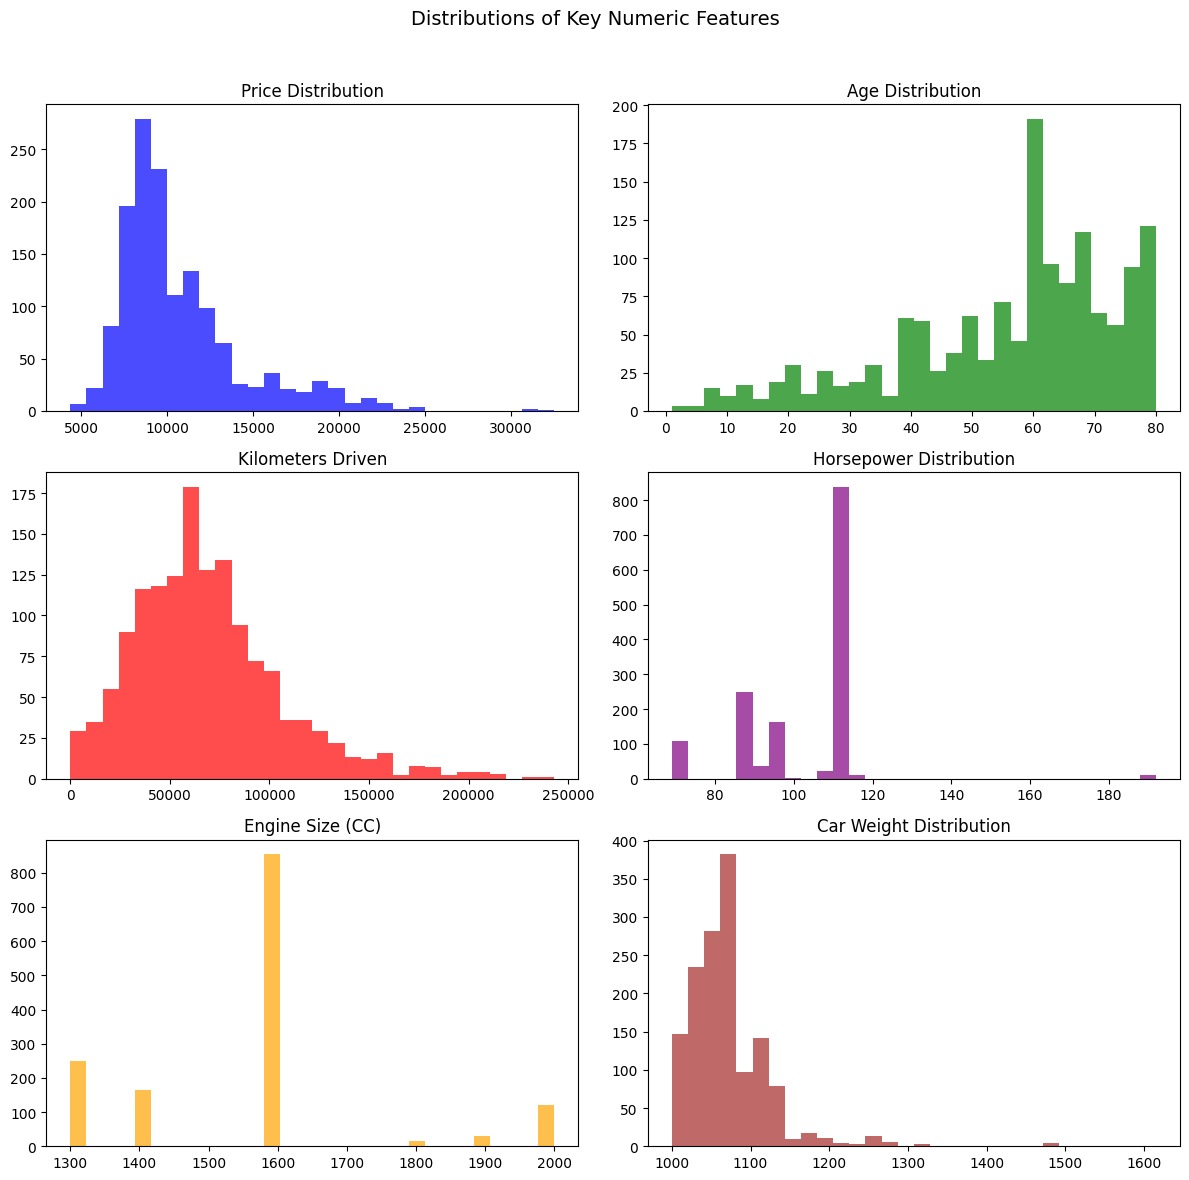

In [11]:

# Plot distributions of numeric features
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Distributions of Key Numeric Features", fontsize=14)

axes[0, 0].hist(df['Price'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title("Price Distribution")
axes[0, 1].hist(df['Age'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title("Age Distribution")
axes[1, 0].hist(df['KM'], bins=30, color='red', alpha=0.7)
axes[1, 0].set_title("Kilometers Driven")
axes[1, 1].hist(df['HP'], bins=30, color='purple', alpha=0.7)
axes[1, 1].set_title("Horsepower Distribution")
axes[2, 0].hist(df['CC'], bins=30, color='orange', alpha=0.7)
axes[2, 0].set_title("Engine Size (CC)")
axes[2, 1].hist(df['Weight'], bins=30, color='brown', alpha=0.7)
axes[2, 1].set_title("Car Weight Distribution")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



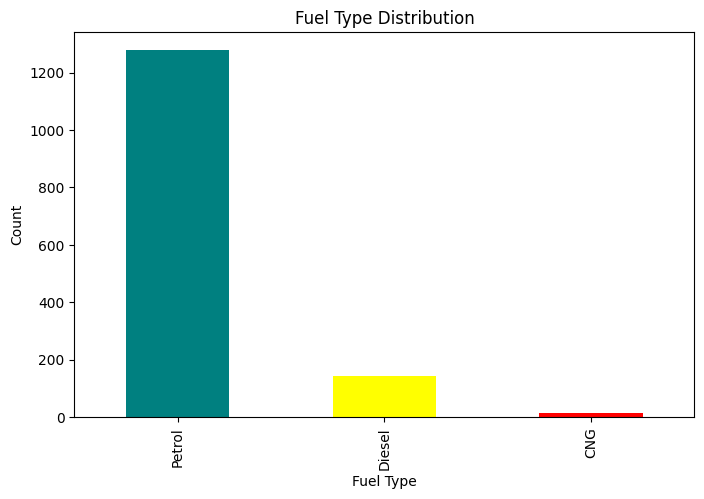

In [15]:

# Fuel Type Distribution
plt.figure(figsize=(8, 5))
df['FuelType'].value_counts().plot(kind='bar', color=['teal', 'yellow', 'red'])
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()



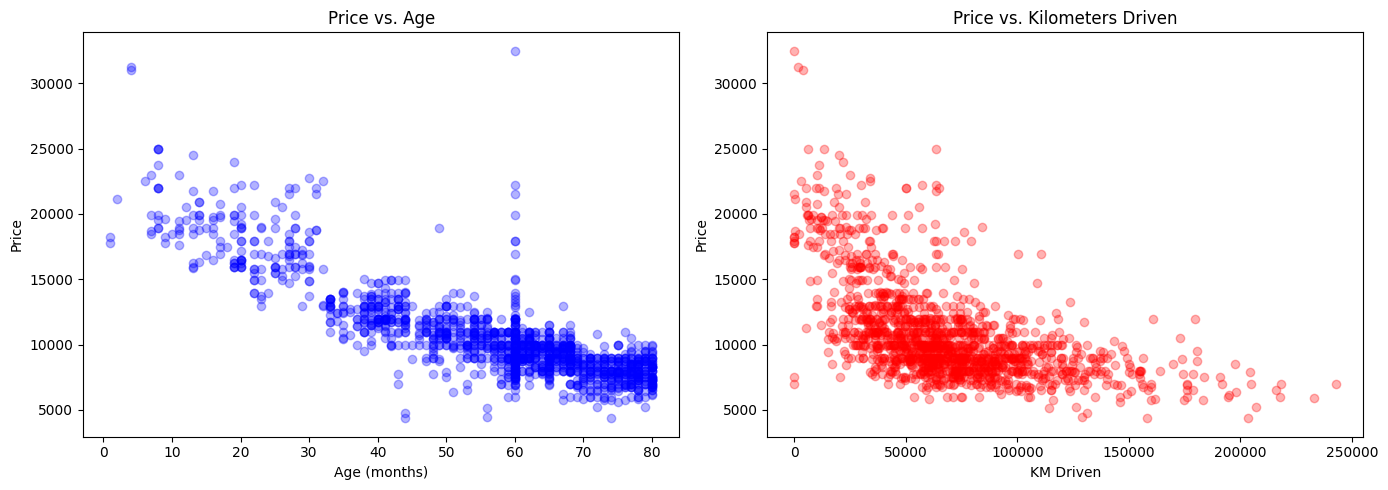

In [17]:
# Scatter plots for relationships between key variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df["Age"], df["Price"], alpha=0.3, color='blue')
axes[0].set_title("Price vs. Age")
axes[0].set_xlabel("Age (months)")
axes[0].set_ylabel("Price")

axes[1].scatter(df["KM"], df["Price"], alpha=0.3, color='red')
axes[1].set_title("Price vs. Kilometers Driven")
axes[1].set_xlabel("KM Driven")
axes[1].set_ylabel("Price")

plt.tight_layout()
plt.show()

# Day - 3

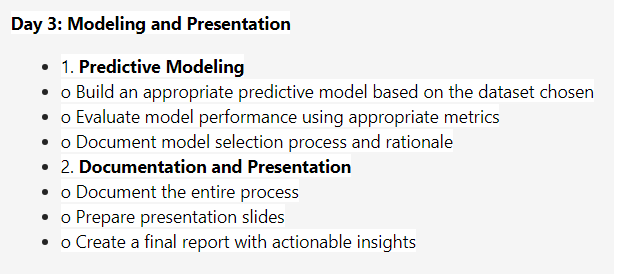

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Age', 'KM', 'HP', 'CC', 'Weight']
target = 'Price'



In [22]:
# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:

# Make predictions
y_pred = model.predict(X_test)



In [ ]:
# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Absolute Error: 1007.7523623460324
Mean Squared Error: 2467859.499716883
R-squared: 0.8150417031532511


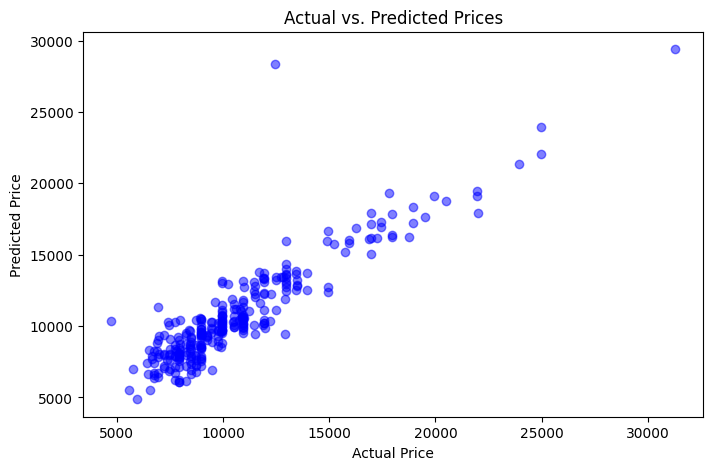

In [ ]:
# Plot actual vs. predicted prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()
